In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
from pandas import to_datetime
from prophet import Prophet
from sklearn.metrics import r2_score,mean_squared_error


/Users/baigeiguai/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


/var/folders/h1/07v9m7ld23b1sjfyjxm7fcdh0000gn/T/ipykernel_95663/2527219260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ds'] = pd.to_datetime(data['ds'], format='%Y%m')
15:13:17 - cmdstanpy - INFO - Chain [1] start processing
15:13:17 - cmdstanpy - INFO - Chain [1] done processing


train_data
            ds        y
0  2011-01-01  265.836
1  2011-02-01   72.268
2  2011-03-01   96.396
3  2011-04-01   76.400
4  2011-05-01  101.368
..        ...      ...
95 2018-12-01   49.500
96 2019-01-01  138.908
97 2019-02-01   22.224
98 2019-03-01   39.540
99 2019-04-01   41.256

[100 rows x 2 columns]
out
             ds
0   2011-01-01
1   2011-02-01
2   2011-03-01
3   2011-04-01
4   2011-05-01
..         ...
112 2020-04-30
113 2020-05-31
114 2020-06-30
115 2020-07-31
116 2020-08-31

[117 rows x 1 columns]
starting
r2: -0.5679188312787988
mse: 1364.0143133856411


/Users/baigeiguai/anaconda3/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


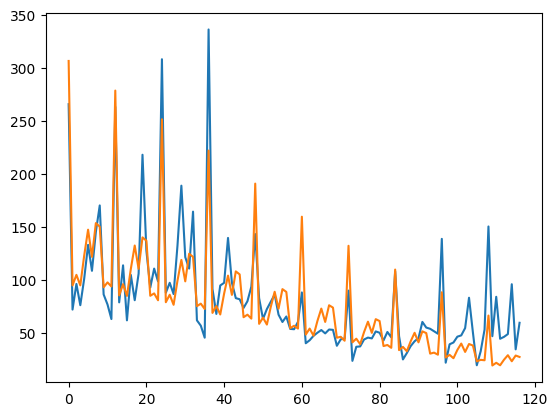

In [6]:
def predict(file_path, #输入文件路径
            data_num,#文件中非空白数据数量
            to_predict_num,/# 文件中空白数据数量
            ):
    raw_data = pd.read_excel(file_path,header=0)
    raw_data['ds'] = raw_data['月份'].astype(str)
    data = raw_data[:data_num]
    data['ds'] = pd.to_datetime(data['ds'], format='%Y%m')

    train_data = data[['ds','销量（箱）']]
    train_data.columns = ['ds', 'y']
    print("train_data\n",train_data)
    
    model = Prophet(seasonality_mode='multiplicative')
    model.fit(train_data)
    out = model.make_future_dataframe(to_predict_num,freq='M')
    print("out\n",out)
    out2 = model.predict(out)
    raw_data['销量（箱）'].plot()
    out2.yhat.plot()
    print("starting")
    # print(raw_data['金额（元）'][:10])
    # print(out2.yhat[:10])
    print("r2:",r2_score(raw_data['销量（箱）'][100:117],out2.yhat[100:117]))
    print("mse:",mean_squared_error(raw_data['销量（箱）'][100:117],out2.yhat[100:117]))
    
    
file_path = './source_data/A1backup.xlsx'
data_num = 100
to_predict_num = 17
predict(file_path,data_num,to_predict_num)

In [4]:
train_data

NameError: name 'train_data' is not defined

In [27]:

import pandas as pd
from prophet import Prophet


df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

print(df.head())
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()





16:47:22 - cmdstanpy - INFO - Chain [1] start processing


           ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572


16:47:23 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.034908,8.237450,9.480997,8.034908,8.034908,0.802953,0.802953,0.802953,0.352291,0.352291,0.352291,0.450662,0.450662,0.450662,0.0,0.0,0.0,8.837861
1,2007-12-11,8.033381,7.972751,9.148251,8.033381,8.033381,0.553051,0.553051,0.553051,0.119618,0.119618,0.119618,0.433434,0.433434,0.433434,0.0,0.0,0.0,8.586432
2,2007-12-12,8.031853,7.773796,9.014409,8.031853,8.031853,0.350484,0.350484,0.350484,-0.066658,-0.066658,-0.066658,0.417141,0.417141,0.417141,0.0,0.0,0.0,8.382337
3,2007-12-13,8.030326,7.740100,9.018227,8.030326,8.030326,0.329951,0.329951,0.329951,-0.072277,-0.072277,-0.072277,0.402228,0.402228,0.402228,0.0,0.0,0.0,8.360277
4,2007-12-14,8.028799,7.728077,9.000035,8.028799,8.028799,0.319535,0.319535,0.319535,-0.069564,-0.069564,-0.069564,0.389100,0.389100,0.389100,0.0,0.0,0.0,8.348334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.185960,7.519735,8.905838,6.855862,7.540060,1.018279,1.018279,1.018279,0.048295,0.048295,0.048295,0.969984,0.969984,0.969984,0.0,0.0,0.0,8.204239
3266,2017-01-16,7.184929,7.829283,9.278659,6.852293,7.540897,1.344302,1.344302,1.344302,0.352291,0.352291,0.352291,0.992010,0.992010,0.992010,0.0,0.0,0.0,8.529231
3267,2017-01-17,7.183899,7.580798,9.023618,6.849341,7.541710,1.132712,1.132712,1.132712,0.119618,0.119618,0.119618,1.013095,1.013095,1.013095,0.0,0.0,0.0,8.316611
3268,2017-01-18,7.182869,7.427187,8.800321,6.846581,7.542509,0.966375,0.966375,0.966375,-0.066658,-0.066658,-0.066658,1.033033,1.033033,1.033033,0.0,0.0,0.0,8.149244
